In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
#%matplotib.inline
from sklearn.datasets import load_digits


/Users/abhishekdatta/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Question 1

In [2]:
digit = load_digits()
x=digit.data
y=digit.target

In [3]:
x.shape , y.shape

((1797, 64), (1797,))

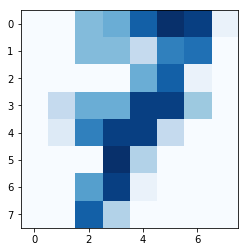

In [27]:
plt.imshow(x[7].reshape(8,8),cmap=plt.cm.Blues)

## Question 2

In [5]:
df1 = pd.DataFrame(x)
df1

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [6]:
df2 = pd.DataFrame(y)
df2

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [7]:
df = pd.concat([df1,df2])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


## Question 3

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3)

## Question 4

In [10]:
reg = LogisticRegression()
reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
pred = reg.predict(X_test)

In [12]:
result = pd.DataFrame({"Predicted":pred,"Actual":Y_test})
result

,Predicted,Actual
0,9,9
1,7,7
2,1,1
3,9,9
4,4,4
5,4,4
6,2,2
7,7,7
8,1,1
9,7,7


In [13]:
reg.score(X_test,Y_test)*100

95.0

## Question 5

In [14]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        57
          1       0.84      0.95      0.89        56
          2       1.00      0.96      0.98        55
          3       0.96      0.96      0.96        51
          4       0.98      0.95      0.96        56
          5       0.94      0.96      0.95        52
          6       0.98      0.98      0.98        45
          7       0.99      0.96      0.97        71
          8       0.87      0.91      0.89        53
          9       0.95      0.89      0.92        44

avg / total       0.95      0.95      0.95       540



In [15]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10,random_state=5)

## Classification Accuracy

In [16]:
results = model_selection.cross_val_score(reg,x,y,cv=kfold,scoring='accuracy')
results

array([0.90555556, 0.95      , 0.89444444, 0.91666667, 0.94444444,
       0.97222222, 0.97777778, 0.95530726, 0.8603352 , 0.93854749])

In [17]:
results.sum()/10

0.931530105524519

## Logarithmic Loss

In [18]:
results = model_selection.cross_val_score(reg,x,y,cv=kfold,scoring='neg_log_loss')
results

array([-0.45799503, -0.1442574 , -0.61754277, -0.27326364, -0.27594721,
       -0.12824173, -0.1102412 , -0.12333459, -0.62680447, -0.68587811])

In [19]:
results.sum()/10

-0.3443506156429384

## R2 Metrics 

In [20]:
results = model_selection.cross_val_score(reg,x,y,cv=kfold,scoring='r2')
results

array([0.73184699, 0.86942354, 0.81023661, 0.79423609, 0.82434177,
       0.94343263, 0.92524112, 0.90725247, 0.60169024, 0.82555495])

In [21]:
results.sum()/10

0.8233256404108781

## Mean Squared Error

In [22]:
from sklearn import metrics
print(metrics.mean_squared_error(Y_test,pred))

1.098148148148148


## Mean Absolute Error

In [23]:
print(metrics.mean_absolute_error(Y_test,pred))

0.20185185185185187


In [24]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,pred))

[[56  0  0  0  0  1  0  0  0  0]
 [ 0 53  0  1  0  0  1  0  1  0]
 [ 0  1 53  1  0  0  0  0  0  0]
 [ 0  0  0 49  0  0  0  0  2  0]
 [ 0  2  0  0 53  0  0  0  0  1]
 [ 0  0  0  0  0 50  0  1  0  1]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  1  0  0  1  0  0 68  1  0]
 [ 0  5  0  0  0  0  0  0 48  0]
 [ 0  1  0  0  0  1  0  0  3 39]]
